In [2]:
# Package for analysis

import pandas as pd
import numpy as np
from sklearn import svm

In [3]:
# Packages for visuals
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

In [4]:
# Pickle Package 
import pickle 

In [5]:
# DataFrame:
recipes = pd.read_csv('Cupcakes vs Muffins.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


c:\Users\M.K.M\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


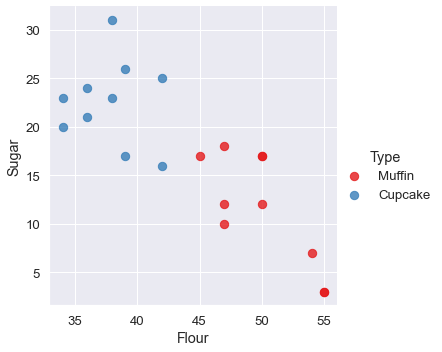

In [6]:
# Plotting our Data:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})

In [7]:
# Format or pre-process our data:
type_label = np.where(recipes['Type'] == 'Muffin', 0 , 1) # where type equals muffine it will be 0 and if not equal then its 1.
recipes_features = recipes.columns.values[1:].tolist()
recipes_features
ingredients = recipes[['Flour', 'Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [8]:
# Fitting our model:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [10]:
# getting the seperating hyperplane:
w = model.coef_[0]
a = (-w[0]) / w[1]
xx = np.linspace(30,60)
yy = (a * xx) - ((model.intercept_[0]) / w[1])
print(yy)

# Plot the parallel to the sperating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.63588995e+13 -4.98713297e+14
 -1.02378549e+15 -1.54885769e+15 -2.07392989e+15 -2.59900208e+15
 -3.12407428e+15 -3.64914648e+15 -4.17421867e+15 -4.69929087e+15
 -5.22436307e+15 -5.74943526e+15 -6.27450746e+15 -6.79957966e+15
 -7.32465185e+15 -7.84972405e+15 -8.37479625e+15 -8.89986844e+15
 -9.42494064e+15 -9.95001284e+15 -1.04750850e+16 -1.10001572e+16
 -1.15252294e+16 -1.20503016e+16 -1.25753738e+16 -1.31004460e+16
 -1.36255182e+16 -1.41505904e+16]


c:\Users\M.K.M\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


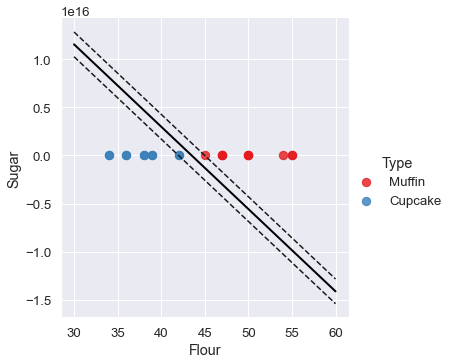

In [17]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [15]:
# Creat a funtion to predict muffin or cupcake:
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]])) == 0:
        print("You're looking at a muffin recipe!")
    else:
        print("You're looking at a muffin recipe!")

# Predict if 50 parts flour and 20 parts sugar:
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


c:\Users\M.K.M\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


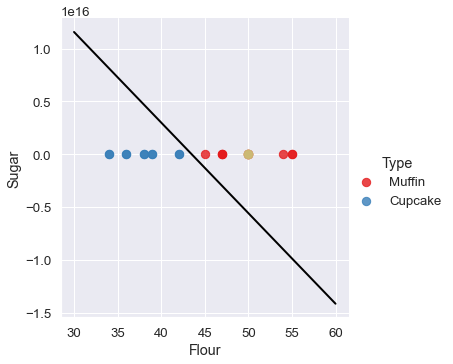

In [19]:
# Lets plot this on the graphs:
# Plot the points to visually see where the points lie:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9')